In [67]:
from sklearn.model_selection import train_test_split

import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd
import random
from pydub import AudioSegment
import import_ipynb
from service.Sample_making import make_sample
from service.mfcc_predict import mfcc_predict
from service.Mfcc import get_mfcc

In [68]:
def insert_one(indicator, index):
    for i in range(index, min(indicator.shape[1], index + 51)):
        indicator[0, i] = 1
    return indicator

In [107]:
def make_predict(flags, threshold):
    
    path = flags['path_name']
    
    data = AudioSegment.from_wav(path)
    indicator = np.zeros((1, len(data)))
    print(len(data))
    temp = []
    
    if len(data) <= flags['frame_lenght']:
        mfcc = get_mfcc(path, flags['mfcc'])
        prediction, prediction_name = mfcc_predict(flags, mfcc)
        if prediction_name != 'unknown' and prediction > threshold:
            insert_one(indicator, index)
    else:
        begin = 0
        shift = flags['shift']
        cnt = 0
        while (begin + flags['frame_lenght'] < len(data)):
            cnt += 1
            interval = data[begin: begin + flags['frame_lenght']]
            save_name = 'interval.wav'
            save_path = interval.export(save_name, format="wav")
            mfcc = get_mfcc(save_name, flags['mfcc'])
            prediction, prediction_name = mfcc_predict(flags, mfcc)
            print(prediction, prediction_name)
            temp.append(prediction)
            if prediction_name != 'unknown' and prediction > threshold:
                indicator = insert_one(indicator, begin)
            begin += flags['shift']
            
    return indicator, temp
    

In [108]:
filename = 'Data_spotter_mfcc_40'
outfile = open(filename,'rb')
X = pickle.load(outfile)
outfile.close()

In [109]:
flags = {
    'noise_len': 10000,
    'Ty': 1375,
    'target_word_count': 3,
    'unknown_word_count': 0,
    'save_name': 'train.wav',
    'duration': 10,
    'sample_rate': 44100,
    'offset': 0,
    'data_type': 'mfcc',
    'n_mfcc': 40
}

In [110]:
mfcc, y = make_sample(flags)

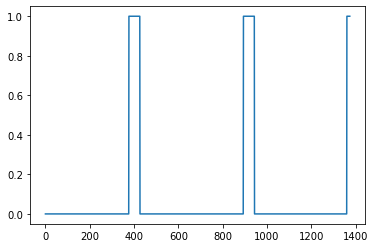

In [111]:
plt.plot(y[0,:])

In [74]:
df = pd.read_csv('../../full_df')

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X
                                                    , df.word
                                                    , test_size=0.1
                                                    , shuffle=True
                                                    , random_state=42)

In [76]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

In [77]:
std.shape

(40, 61)

In [112]:
flags_1 = {
    'mean': mean,
    'std': std,
    'model': 'AT_RNN',
    'mfcc': {
        'offset': 0,
        'duration': 1,
        'sample_rate': 44100,
        'n_mfcc': 40,
        'columns': 61
    },
    'path_name': 'train.wav',
    'shift': 200,
    'frame_lenght': 1000,
}

In [113]:
indicator, temp = make_predict(flags_1, 0.85)

10000
1/1 [==============================] - 1s 819ms/step
[0.46404812] unknown
1/1 [==============================] - 0s 62ms/step
[0.41855386] unknown
1/1 [==============================] - 0s 124ms/step
[0.40090153] up
1/1 [==============================] - 0s 141ms/step
[0.43352637] unknown
1/1 [==============================] - 0s 102ms/step
[0.4493687] up
1/1 [==============================] - 0s 72ms/step
[0.57432306] unknown
1/1 [==============================] - 0s 91ms/step
[0.8026835] unknown
1/1 [==============================] - 0s 69ms/step
[0.9871631] unknown
1/1 [==============================] - 0s 132ms/step
[0.9987544] unknown
1/1 [==============================] - 0s 74ms/step
[0.98732495] unknown
1/1 [==============================] - 0s 72ms/step
[0.9787001] unknown
1/1 [==============================] - 0s 73ms/step
[0.8751452] off
1/1 [==============================] - 0s 140ms/step
[0.55923605] unknown
1/1 [==============================] - 0s 61ms/step
[0.6560

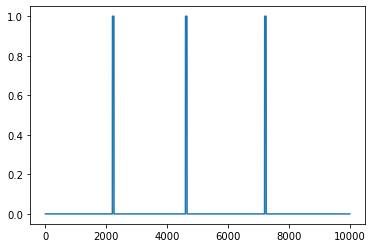

In [114]:
plt.plot(indicator[0,:])

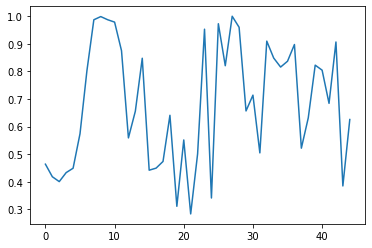

In [115]:
plt.plot(temp)

In [39]:
ipd.Audio('interval.wav')

In [114]:
ipd.Audio('train.wav')